In [11]:
class Vector:
    def __init__(self, *nums):
        self.nums = nums

    def __str__(self):
        return "{}".format(self.nums)

    def __add__(self, other):
        return Vector(*[c1 + c2 for c1, c2 in zip(self.nums, other.nums)])

    def dot(self, other):
        return sum((c1 * c2 for c1, c2 in zip(self.nums, other.nums)))

    def scale(self, scalar):
        return Vector(*[n * scalar for n in self.nums])

    def norm(self):
        return self.dot(self) ** 0.5

In [12]:
from collections import Counter


class Knn:
    def __init__(self):
        self.vectors = []
        self.species = []

    def train(self, vector, species):
        self.vectors.append(vector)
        self.species.append(species)

    def predict(self, vector, k):
        lengths = [(vector.scale(-1) + v).norm() for v in self.vectors]
        lenspec = [(length, self.species[i]) for i, length in enumerate(lengths)]
        tuples = sorted(lenspec, key=lambda t: t[0])[:k]
        species = [t[1] for t in tuples]
        counter = Counter(species)
        return counter.most_common(1)[0][0]


In [22]:
model = Knn()
dev_acc = []

experiments = []
with open('data/train.csv') as f:
    for line in f:
        data = line.strip().split(',')
        vector = Vector(*map(float, data[:4]))
        species = data[-1]
        model.train(vector, species)

experiments = []
with open('data/train.csv') as f:
    for line in f:
        data = line.strip().split(',')
        vector = Vector(*map(float, data[:4]))
        species = data[-1]
        prediction = model.predict(vector, 1)
        experiments.append(species == prediction)

accuracy = sum(experiments) / len(experiments)
dev_acc.append(accuracy)
print('accuracy k=1:', accuracy)

experiments = []
with open('data/train.csv') as f:
    for line in f:
        data = line.strip().split(',')
        vector = Vector(*map(float, data[:4]))
        species = data[-1]
        prediction = model.predict(vector, 3)
        experiments.append(species == prediction)

accuracy = sum(experiments) / len(experiments)
dev_acc.append(accuracy)
print('accuracy k=3:', accuracy)

experiments = []
with open('data/train.csv') as f:
    for line in f:
        data = line.strip().split(',')
        vector = Vector(*map(float, data[:4]))
        species = data[-1]
        prediction = model.predict(vector, 5)
        experiments.append(species == prediction)

accuracy = sum(experiments) / len(experiments)
dev_acc.append(accuracy)
print('accuracy k=5:', accuracy)

experiments = []
with open('data/train.csv') as f:
    for line in f:
        data = line.strip().split(',')
        vector = Vector(*map(float, data[:4]))
        species = data[-1]
        prediction = model.predict(vector, 7)
        experiments.append(species == prediction)

accuracy = sum(experiments) / len(experiments)
dev_acc.append(accuracy)
print('accuracy k=7:', accuracy)

accuracy k=1: 1.0
accuracy k=3: 0.9558823529411765
accuracy k=5: 0.9705882352941176
accuracy k=7: 0.9705882352941176


In [23]:
experiments = []
with open('data/test.csv') as f:
    for line in f:
        data = line.strip().split(',')
        vector = Vector(*map(float, data[:4]))
        species = data[-1]
        prediction = model.predict(vector, 1)
        experiments.append(species == prediction)

accuracy = sum(experiments) / len(experiments)
print('accuracy with best parameters k=1:', accuracy)

accuracy with best parameters k=1: 1.0


[1.0, 0.9558823529411765, 0.9705882352941176, 0.9705882352941176, 1.0, 1.0, 1.0]


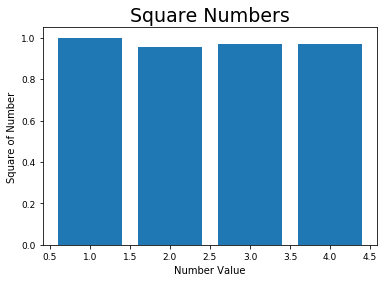

In [27]:
import matplotlib.pyplot as plt
print(l)
# List to hold x values.
x_number_values = [1, 2, 3, 4]

# List to hold y values.
y_number_values = dev_acc

# Plot the number in the list and set the line thickness.
plt.bar(x_number_values, y_number_values)

# Set the line chart title and the text font size.
plt.title("Square Numbers", fontsize=19)

# Set x axes label.
plt.xlabel("Number Value", fontsize=10)

# Set y axes label.
plt.ylabel("Square of Number", fontsize=10)

# Set the x, y axis tick marks text size.
plt.tick_params(axis='both', labelsize=9)

# Display the plot in the matplotlib's viewer.
plt.show()